# **[EXPORT]**  
**┗ 기본편🎉**
---

## **🔒 [제조] 문제**
---
* **제시된 제조 데이터(Time Series, 시계열)를 대상으로 아래 주어진 문제를 분석 및 시각화 하시오**

* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|datetime|시간|
|Accelerometer1RMS|진동 가속도1|
|Accelerometer2RMS|진동 가속도2|
|Current |전기모터 암페어(Ampere)|
|Pressure|워터 펌프 후 루프의 압력(Bar) |
|Temperature|엔진의 온도(섭씨 온도)|
|Thermocouple|순환 루프에서 유체의 온도(섭씨 온도)|
|Voltage|전기 모터의 전압(Volt)|
|RateRMS|루프 내부의 유체의 순환 유량(Liter/min)|
|anomaly|이상여부|
|changepoint|변경점 여부|

In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir("/content/drive/MyDrive/Export/Anomal")
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Export/Anomal'

In [ ]:
import pandas as pd
df = pd.read_csv('example_1.csv', sep=";")
df.head()

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
0,2020-03-09 16:16:30,0.027545,0.041127,0.673506,0.054711,67.8345,24.3164,240.513,32.0,0.0,0.0
1,2020-03-09 16:16:31,0.027997,0.039100,0.772264,0.054711,67.8704,24.3279,229.523,32.0,0.0,0.0
2,2020-03-09 16:16:32,0.028418,0.038872,0.675520,0.054711,67.7882,24.3261,242.708,32.0,0.0,0.0
3,2020-03-09 16:16:33,0.027625,0.039366,0.566279,-0.273216,67.7918,24.3323,229.709,32.0,0.0,0.0
4,2020-03-09 16:16:34,0.027484,0.041854,1.292170,0.054711,67.7368,24.3250,242.746,32.0,0.0,0.0


### Question 01

In [ ]:
# (1) Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력
df.shape

(1063, 11)

In [ ]:
# (2) Data type 확인 → 각 Column별 Data Type 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             1063 non-null   object 
 1   Accelerometer1RMS    1063 non-null   float64
 2   Accelerometer2RMS    1063 non-null   float64
 3   Current              1063 non-null   float64
 4   Pressure             1063 non-null   float64
 5   Temperature          1063 non-null   float64
 6   Thermocouple         1063 non-null   float64
 7   Voltage              1063 non-null   float64
 8   Volume Flow RateRMS  1063 non-null   float64
 9   anomaly              1063 non-null   float64
 10  changepoint          1063 non-null   float64
dtypes: float64(10), object(1)
memory usage: 91.5+ KB


In [ ]:
# (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
df.isnull().sum()

datetime               0
Accelerometer1RMS      0
Accelerometer2RMS      0
Current                0
Pressure               0
Temperature            0
Thermocouple           0
Voltage                0
Volume Flow RateRMS    0
anomaly                0
changepoint            0
dtype: int64

### Question 02

```
01번 문제에서 Read한 데이터를 활용하여, 다음 시각화를 진행하시오.

  (1) 전체 데이터의 개수에서 'anomaly'가 차지하는 비율은?
  
  (2) 'Accelerometer1RMS','Accelerometer2RMS','Current','Pressure','Temperature','Thermocouple','Voltage','Volume Flow RateRMS'
  총 8개의 Column 대상으로 총 8개의 Trend 그래프를 시각화 하시오.
  (※ x = 'datetime', y= 각 Column)

  (3) 시각화만 Trend 그래프 위에 'anomaly'가 1인 데이터에 대해서 이상 포인트를 표시하시오.
  (※ Trend 그래프에서 이상 Point를 구별할 수 있는 방법이라면 자유롭게 표현 가능)

```

#### 2-1

In [ ]:
# (1) 전체 데이터의 개수에서 'anomaly'가 차지하는 비율은?
df['anomaly'].value_counts(1)

0.0    0.686736
1.0    0.313264
Name: anomaly, dtype: float64

#### Time 추가 탐색

```
1063개의 데이터

2020-03-09 16:16:30 ~ 16:36:30

2020-03-09 16:31:29 ~ 16:32:31 1분간 없으며, 중간 데이터 누락(75개) 존재.

```


In [ ]:
#시간대 확인
print(df['datetime'].nunique())
print(df['datetime'])

1063
0       2020-03-09 16:16:30
1       2020-03-09 16:16:31
2       2020-03-09 16:16:32
3       2020-03-09 16:16:33
4       2020-03-09 16:16:34
               ...         
1058    2020-03-09 16:36:26
1059    2020-03-09 16:36:27
1060    2020-03-09 16:36:28
1061    2020-03-09 16:36:29
1062    2020-03-09 16:36:30
Name: datetime, Length: 1063, dtype: object


In [ ]:
# 시간차이 확인
df['datetime'] = pd.to_datetime(df['datetime'])
df['time_diff'] = df['datetime'] - df['datetime'].shift(1)
df['time_diff'].unique()

array([      'NaT',  1000000000,  2000000000, 64000000000],
      dtype='timedelta64[ns]')

In [ ]:
df[df['time_diff'] != pd.Timedelta(seconds=1)][['datetime','time_diff']]
#첫 행 + 1분 공백 1개 + 2초 간격 75개 존재

,datetime,time_diff
0,2020-03-09 16:16:30,NaT
5,2020-03-09 16:16:36,0 days 00:00:02
20,2020-03-09 16:16:52,0 days 00:00:02
34,2020-03-09 16:17:07,0 days 00:00:02
48,2020-03-09 16:17:22,0 days 00:00:02
...,...,...
987,2020-03-09 16:35:11,0 days 00:00:02
1001,2020-03-09 16:35:26,0 days 00:00:02
1019,2020-03-09 16:35:45,0 days 00:00:02
1037,2020-03-09 16:36:04,0 days 00:00:02


In [ ]:
df[df['time_diff'] == pd.Timedelta(seconds=64)]

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint,time_diff
838,2020-03-09 16:32:32,0.027447,0.040173,1.01695,0.054711,68.3797,24.266,231.239,29.9608,1.0,1.0,0 days 00:01:04


In [ ]:
df[837:840]
# 2020-03-09 16:31:29 ~ 16:32:31 1분간 없음

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint,time_diff
837,2020-03-09 16:31:28,0.027886,0.040552,0.659105,0.054711,68.7719,24.2767,224.555,29.0000,1.0,0.0,0 days 00:00:01
838,2020-03-09 16:32:32,0.027447,0.040173,1.016950,0.054711,68.3797,24.2660,231.239,29.9608,1.0,1.0,0 days 00:01:04
839,2020-03-09 16:32:33,0.027411,0.040218,0.966904,0.710565,68.2498,24.2646,229.987,29.0000,1.0,0.0,0 days 00:00:01


#### 2-2

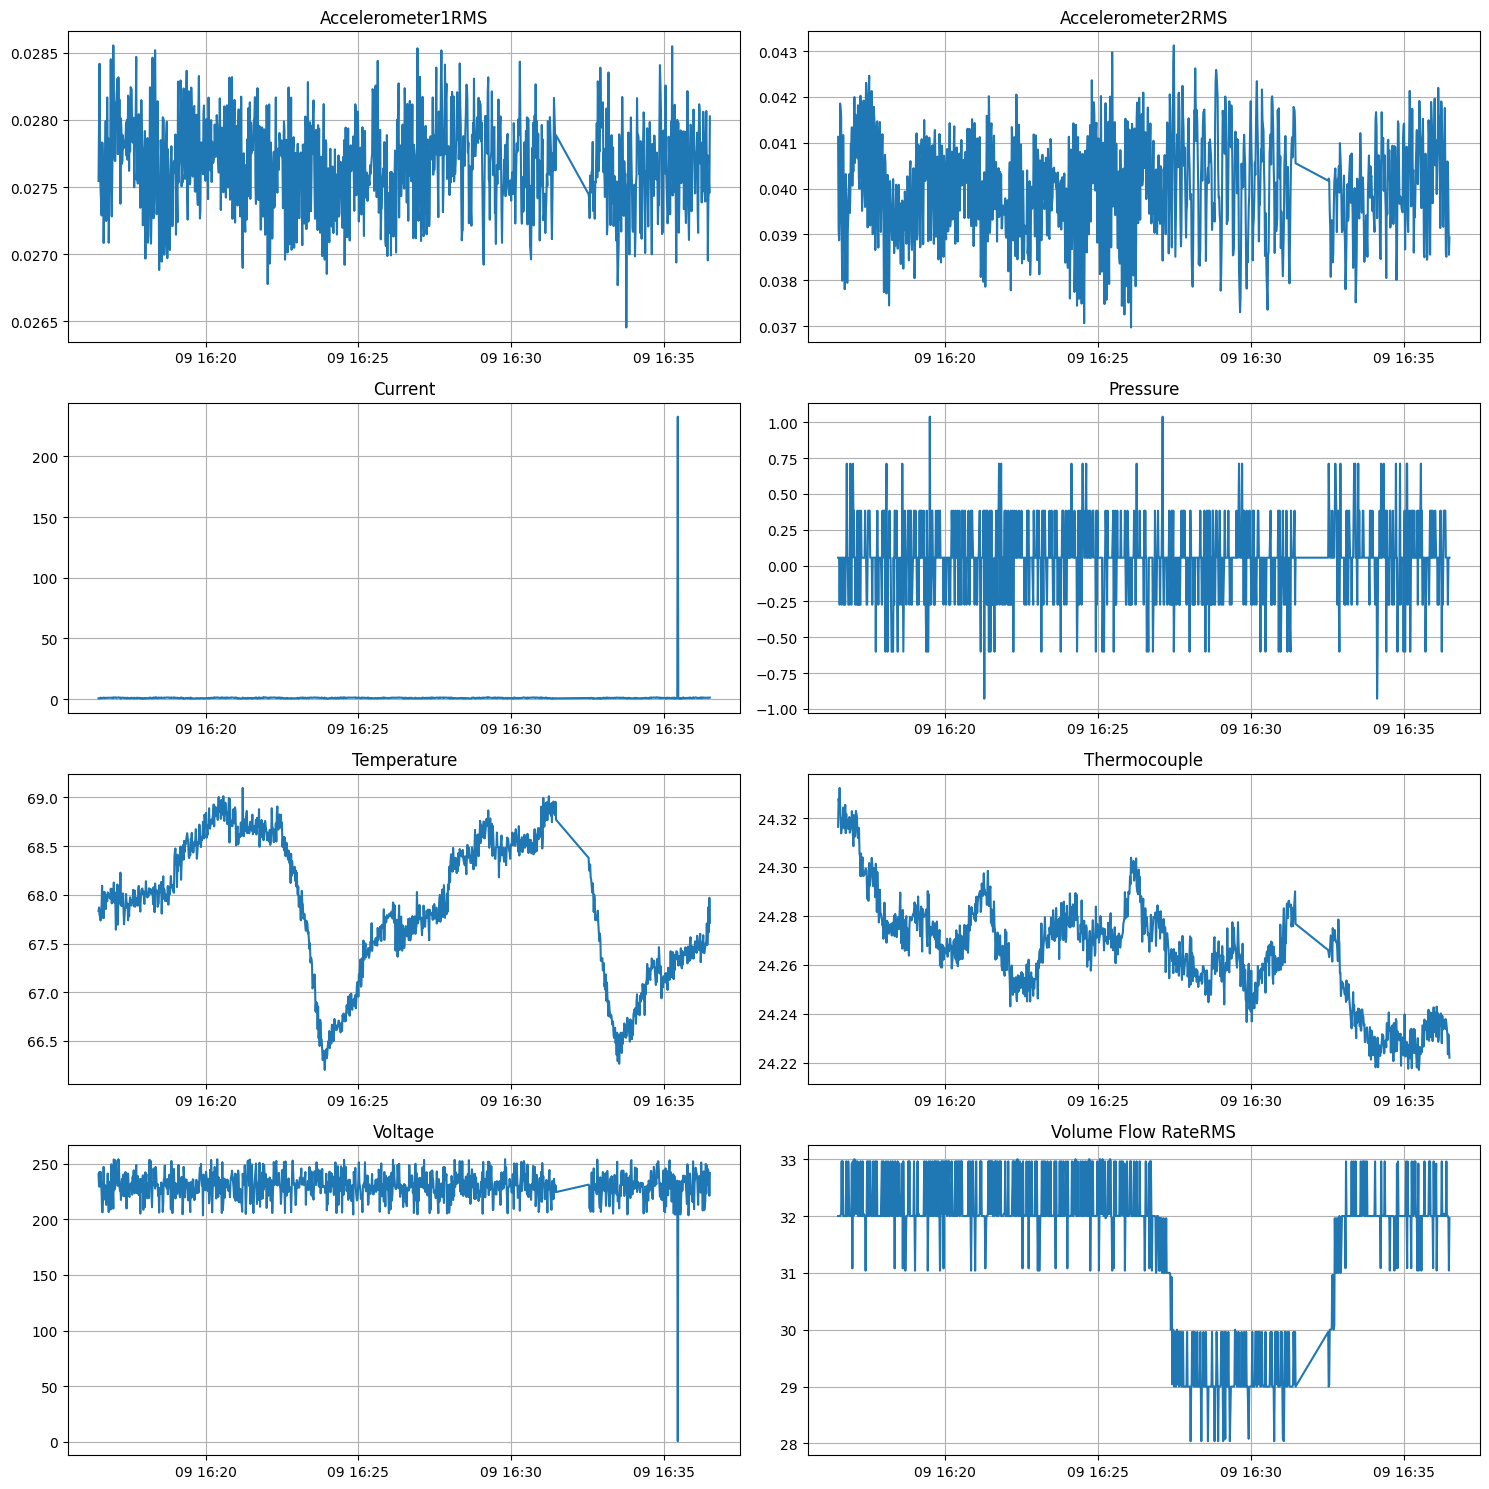

In [ ]:
# (2) 'Accelerometer1RMS','Accelerometer2RMS','Current','Pressure','Temperature','Thermocouple','Voltage','Volume Flow RateRMS'
#   총 8개의 Column 대상으로 총 8개의 Trend 그래프를 시각화 하시오.
#   (※ x = 'datetime', y= 각 Column)

import matplotlib.pyplot as plt
import seaborn as sns

columns = ['Accelerometer1RMS', 'Accelerometer2RMS', 'Current', 'Pressure', 'Temperature', 'Thermocouple', 'Voltage', 'Volume Flow RateRMS']

fig, axes = plt.subplots(4, 2, figsize=(15, 15))

for i, column in enumerate(columns):
    axes[i//2, i%2].plot(df['datetime'], df[column])
    axes[i//2, i%2].set_title(column)
    axes[i//2,i%2].grid()

plt.tight_layout()
plt.show()

####2-3

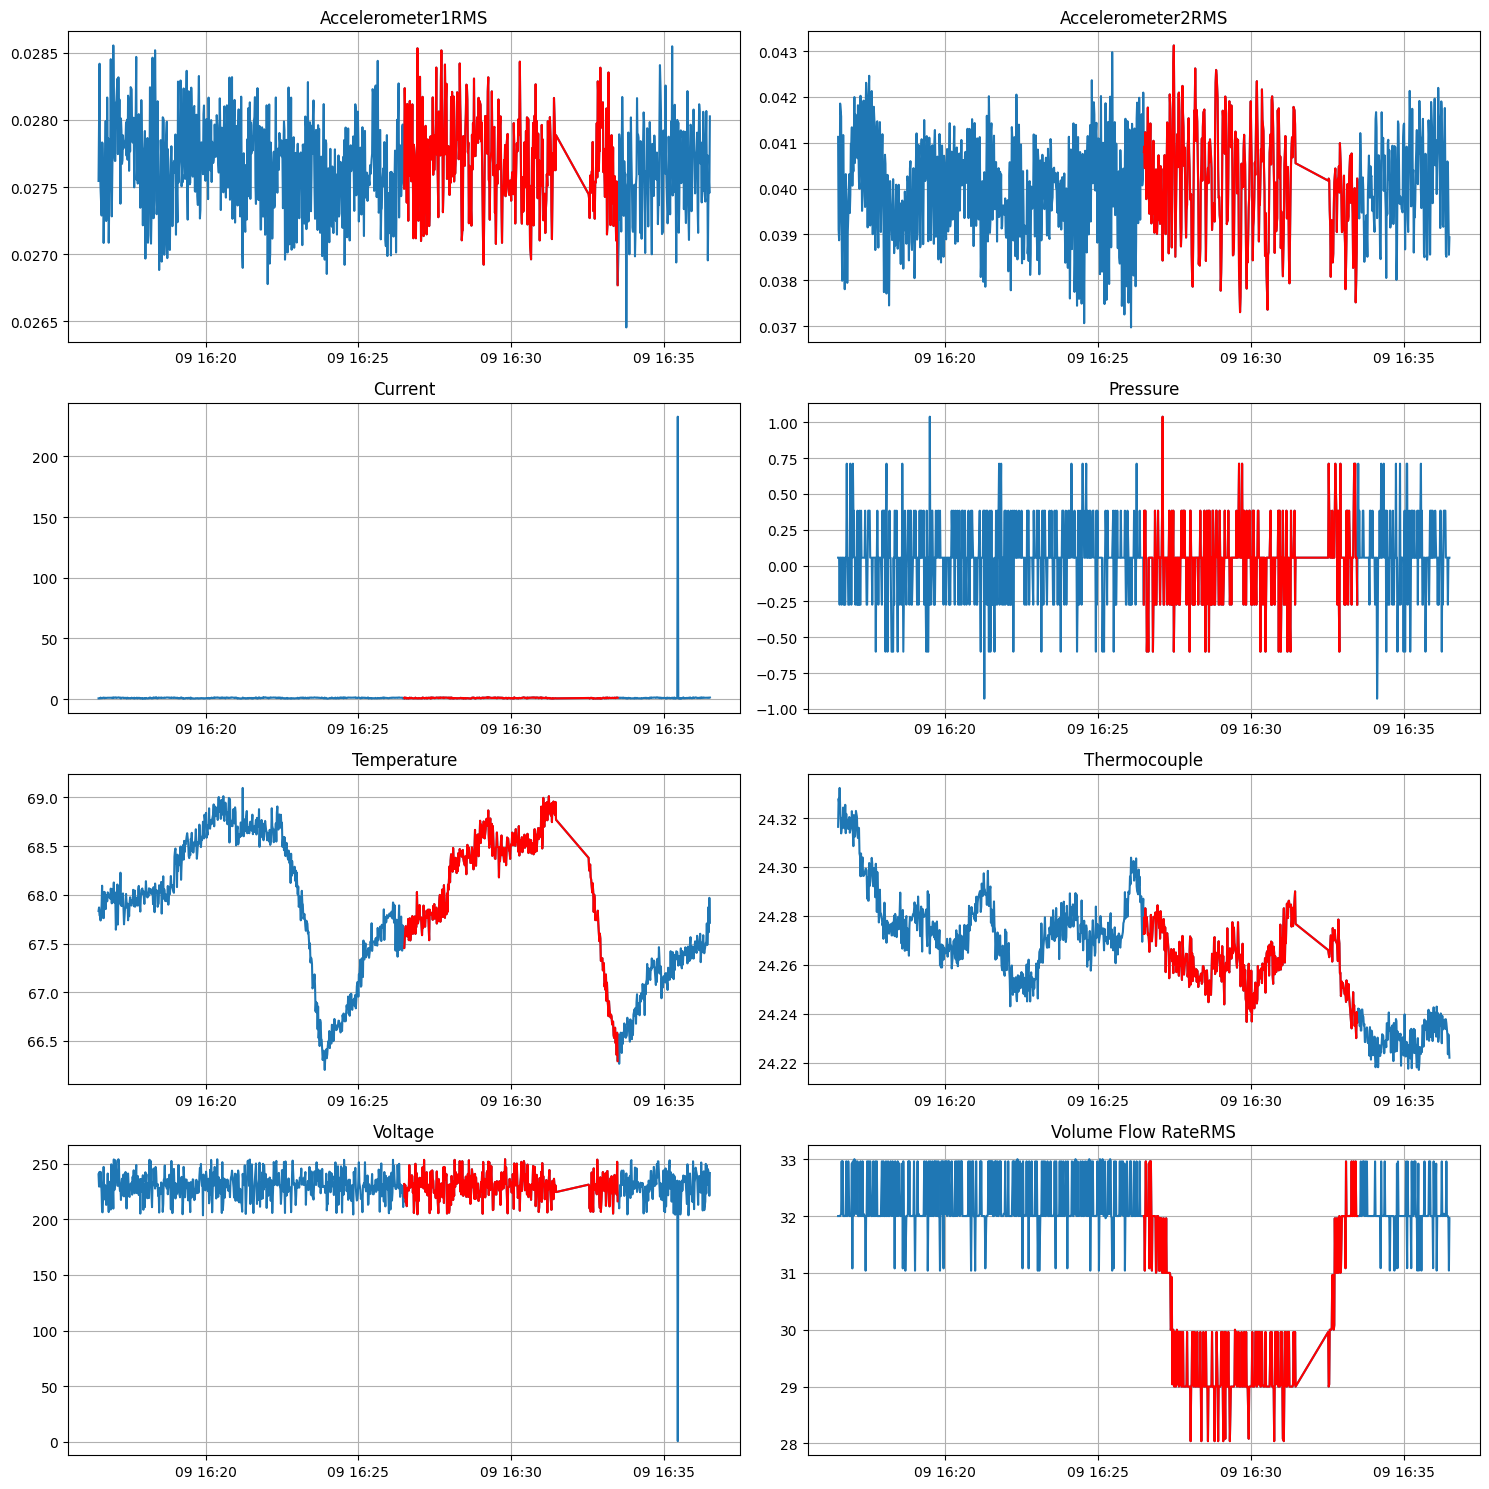

In [ ]:
#   (3) 시각화만 Trend 그래프 위에 'anomaly'가 1인 데이터에 대해서 이상 포인트를 표시하시오.
#   (※ Trend 그래프에서 이상 Point를 구별할 수 있는 방법이라면 자유롭게 표현 가능)

fig, axes = plt.subplots(4, 2, figsize=(15, 15))

for i, column in enumerate(columns):
    axes[i//2, i%2].plot(df['datetime'], df[column])
    axes[i//2, i%2].plot(df['datetime'][df['anomaly'] == 1], df[column][df['anomaly'] == 1], color= 'red')
    axes[i//2, i%2].set_title(column)
    axes[i//2, i%2].grid()

plt.tight_layout()
plt.show()
#Volum Flow RateRMS가 Anomaly 유발한다고 판단됨.

#### 추가 탐색

```
-1분간 비어있는 시간 탐색 (16:31:29 ~ 16:32:31)
이상상태(Anomaly =1)

- Current = 232.734 , Voltage=0 이상치 탐색
다른 변수 이상없어 전류전압측정기 오류로 예상됨

```

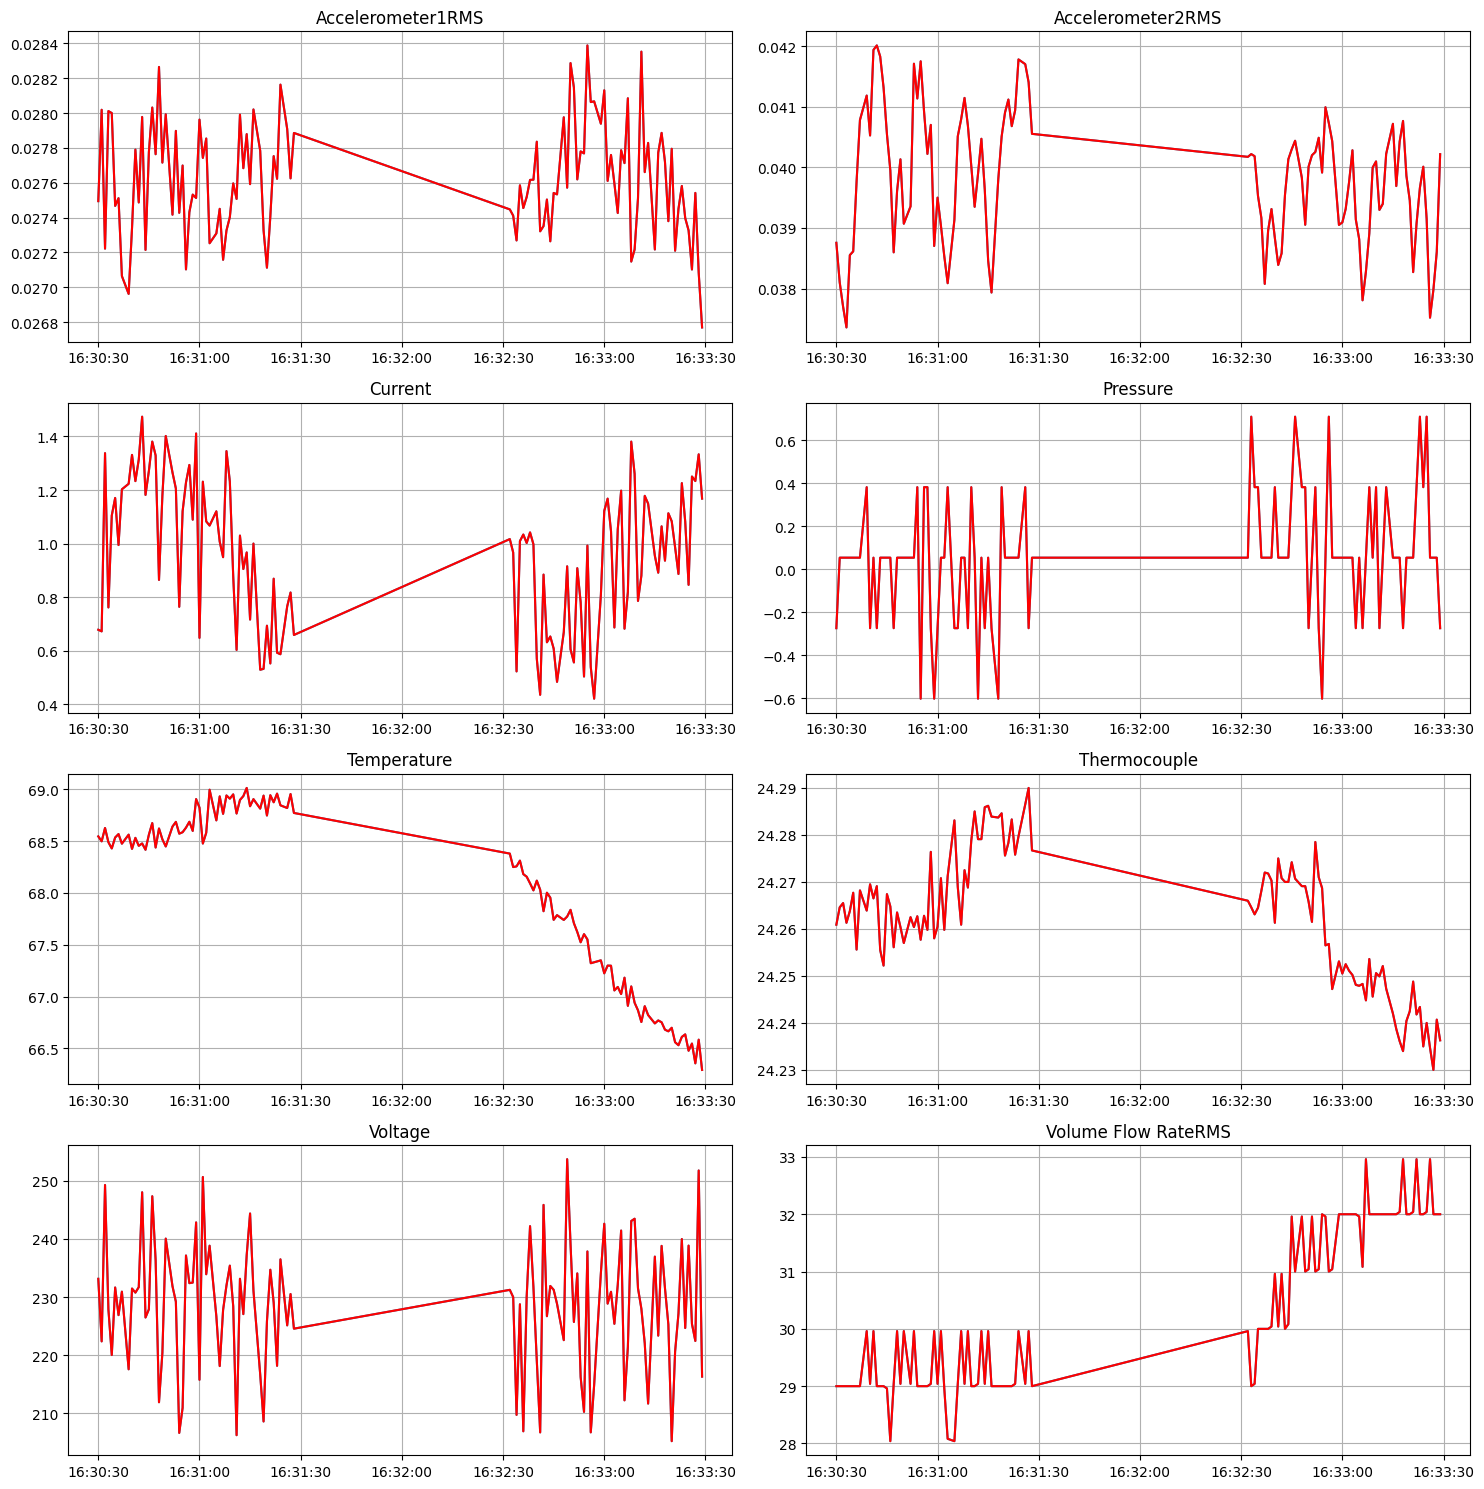

In [ ]:
# 1분간 비어있는 시간 탐색 (16:31:29 ~ 16:32:31)
df_empty_time = df[(df['datetime'] >= '2020-03-09 16:30:30')&
                   (df['datetime'] <= '2020-03-09 16:33:30')]


fig, axes = plt.subplots(4, 2, figsize=(15, 15))

for i, column in enumerate(columns):
    axes[i//2, i%2].plot(df_empty_time['datetime'], df_empty_time[column])
    axes[i//2, i%2].plot(df_empty_time['datetime'][df_empty_time['anomaly'] == 1], df_empty_time[column][df_empty_time['anomaly'] == 1], color= 'red')
    axes[i//2, i%2].set_title(column)
    axes[i//2, i%2].grid()

plt.tight_layout()
plt.show()


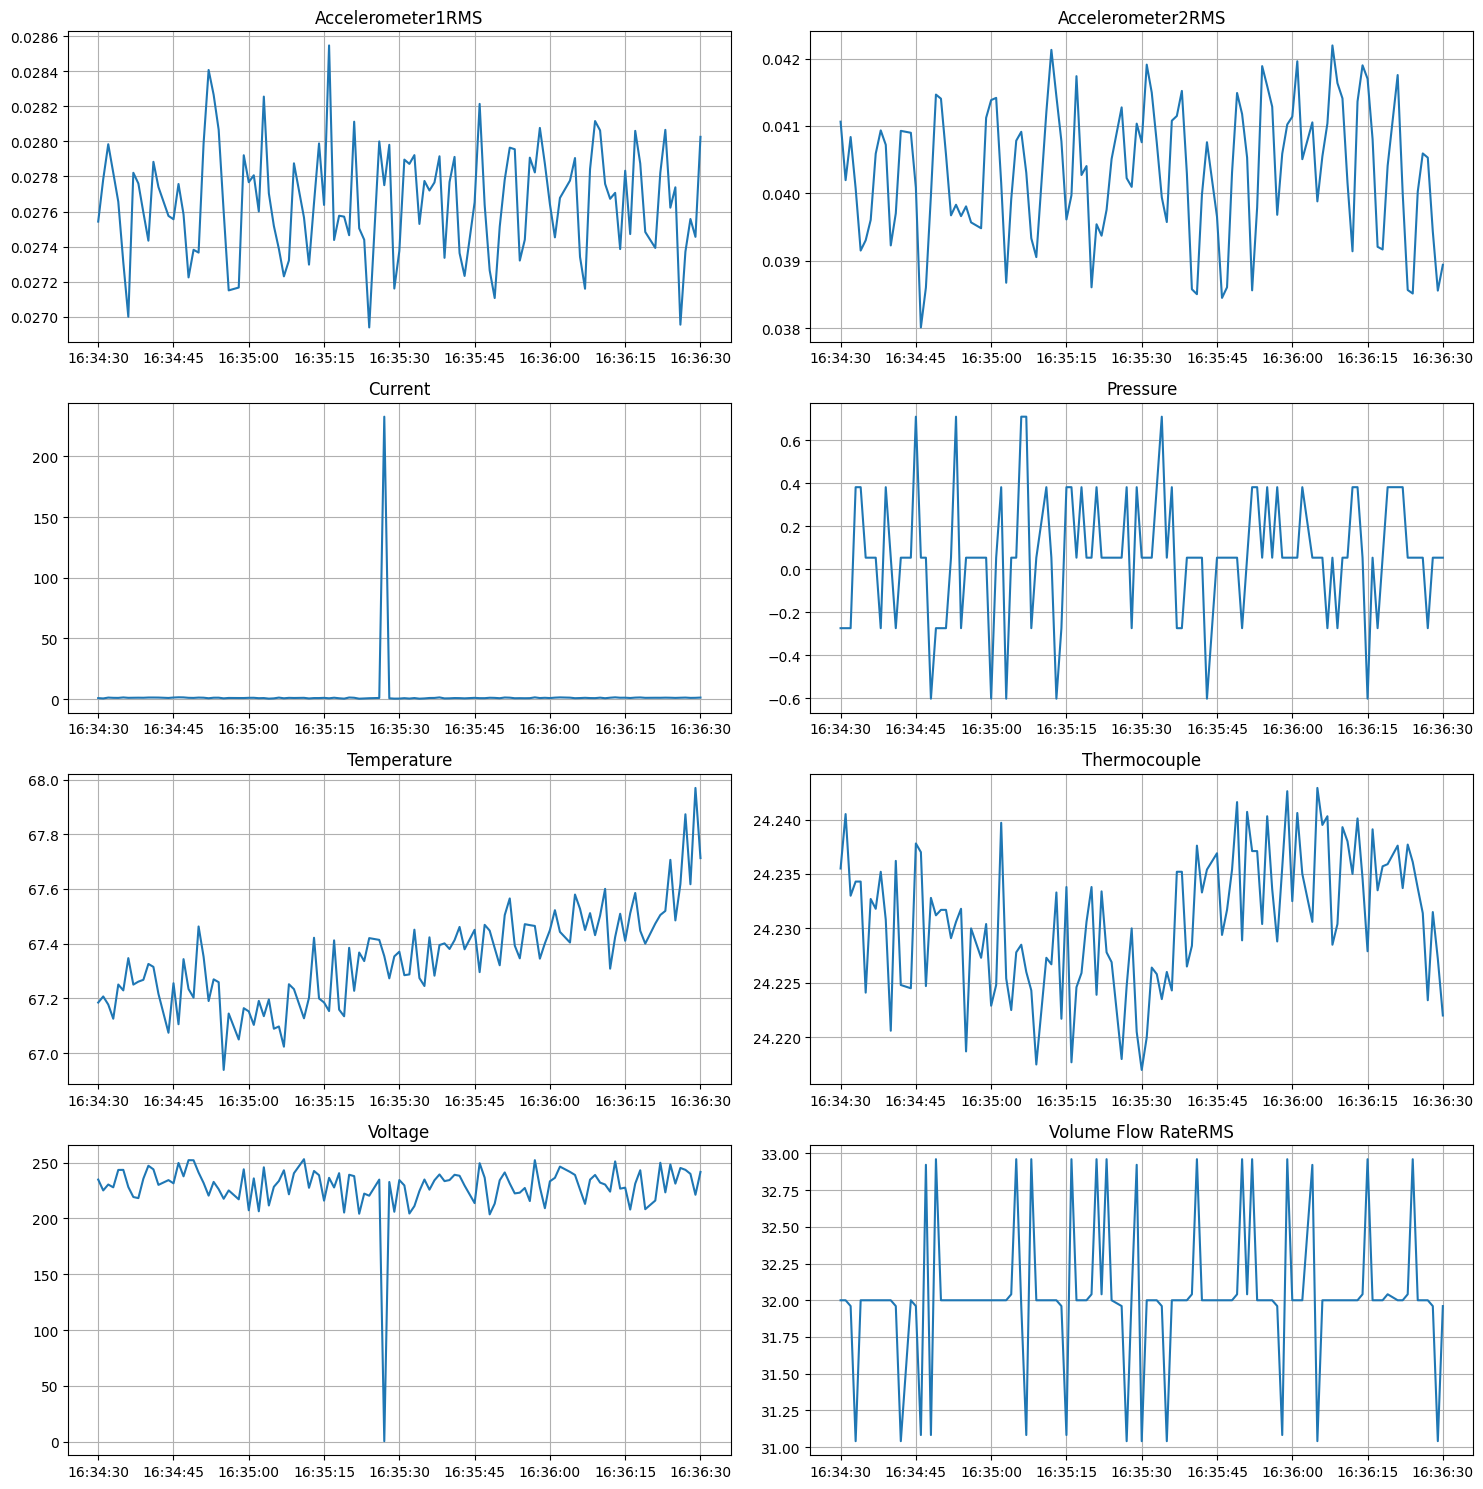

In [ ]:
# Current+Voltage 이상치 시간 대 탐색
df_outlier = df[(df['datetime'] >= '2020-03-09 16:34:30')&
                   (df['datetime'] <= '2020-03-09 16:36:30')]


fig, axes = plt.subplots(4, 2, figsize=(15, 15))

for i, column in enumerate(columns):
    axes[i//2, i%2].plot(df_outlier['datetime'], df_outlier[column])
    axes[i//2, i%2].plot(df_outlier['datetime'][df_outlier['anomaly'] == 1], df_outlier[column][df_outlier['anomaly'] == 1], color= 'red')
    axes[i//2, i%2].set_title(column)
    axes[i//2, i%2].grid()

plt.tight_layout()
plt.show()

## **🔒 [금융] 문제**
---
* **제시된 금융 데이터(Non Time-Series)를 대상으로 아래 주어진 문제를 분석 및 시각화 하시오**

* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|step|1step이 1시간인 시간 단위|
|type|온라인 거래유형|
|amount|거래 금액|
|nameOrig|거래 시작 고객|
|oldbalanceOrg|거래 전 잔액|
|newbalanceOrig|거래 후 잔액|
|nameDest|거래 수신 고객|
|oldbalanceDest|거래 전 수취인의 초기 잔액|
|newbalanceDest|거래 후 받는 사람의 새 잔액|
|isFraud|사기 거래|
|isFlaggedFraud|의심사기거래|


In [ ]:
import pandas as pd
df = pd.read_csv('example_2.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Question 01

In [ ]:
# (1) Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력
df.shape

(6362620, 11)

In [ ]:
#   (2) Data type 확인 → 각 Column별 Data Type 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
#   (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Question 02

```
01번 문제에서 Read한 데이터를 활용하여, 다음 지표들을 추출하시오.

  (1) 'isFraud' Column을 활용하여, 전체 사기율(%)을 계산하시오.

  (2) 'type'에 따른 사기율(%)을 계산하시오.

  (3) 사기거래와 사기거래가 아닌 거래의 amount의 분포를 비교하시오.
  (※ isFraud가 1인 데이터 1000개를 Sampling하고 isFraud가 0인 데이터를 1000개를 Sampling하여 시각화 할 것)

```

#### 추가 탐색
```
Type 5종류
['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']

```

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df.describe(exclude='number')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [ ]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

#### 2-1

In [ ]:
#  (1) 'isFraud' Column을 활용하여, 전체 사기율(%)을 계산하시오.
df['isFraud'].value_counts(1)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

In [ ]:
df['isFlaggedFraud'].value_counts(1)

0    0.999997
1    0.000003
Name: isFlaggedFraud, dtype: float64

####2-2

In [ ]:
#  (2) 'type'에 따른 사기율(%)을 계산하시오.
type_list = ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']

for i in type_list:
    fraud_rate = df[df['type'] == i]['isFraud'].value_counts(1).get(1, 0) * 100
    print(f"Type: {i}\nFraud Rate: {fraud_rate:.8f}%"

#Transer의 높은 비율

Type: PAYMENT

Fraud Rate: 0.00000000%
Type: TRANSFER

Fraud Rate: 0.76879918%
Type: CASH_OUT

Fraud Rate: 0.18395531%
Type: DEBIT

Fraud Rate: 0.00000000%
Type: CASH_IN

Fraud Rate: 0.00000000%


####2-3

In [ ]:
#  (3) 사기거래와 사기거래가 아닌 거래의 amount의 분포를 비교하시오.
#   (※ isFraud가 1인 데이터 1000개를 Sampling하고 isFraud가 0인 데이터를 1000개를 Sampling하여 시각화 할 것)

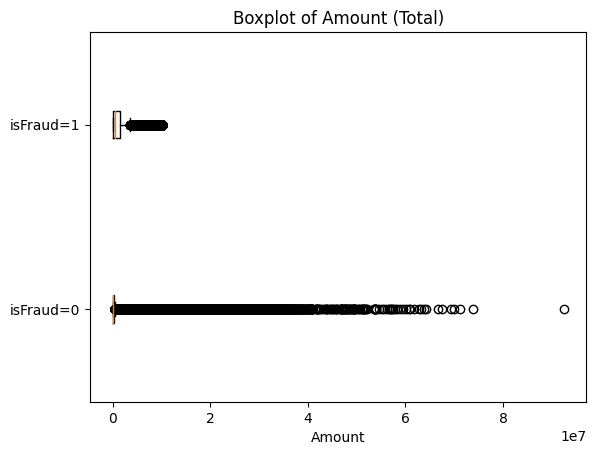

In [ ]:
#전체 박스플롯 확인
df0 = df[df['isFraud'] == 0]['amount']
df1 = df[df['isFraud'] == 1]['amount']
df_fraud = [df0,df1]

plt.boxplot(df_fraud,vert=False,labels=['isFraud=0', 'isFraud=1'])
plt.title('Boxplot of Amount (Total)')
plt.xlabel('Amount')
plt.xticks
plt.show()
#isFraud=1 : max = 10,000,000 (주인한테 연락 안가는 최대 금액인가?)

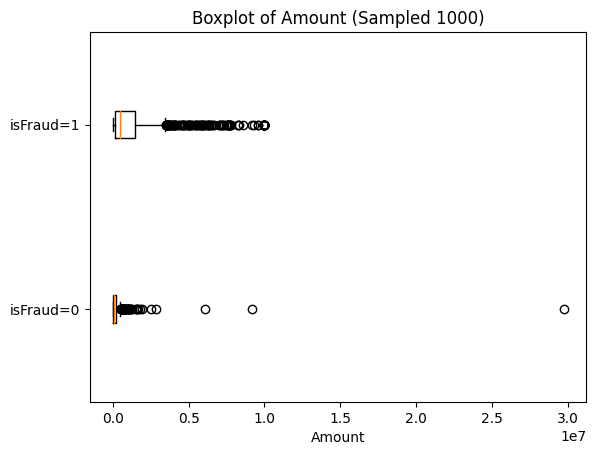

In [ ]:
#1000개 샘플링 박스플롯

df0_sampled = df[df['isFraud'] == 0]['amount'].sample(1000,random_state=23)
df1_sampled = df[df['isFraud'] == 1]['amount'].sample(1000,random_state=23)
df_fraud_sampled = [df0_sampled,df1_sampled]

plt.boxplot(df_fraud_sampled,vert=False,labels=['isFraud=0', 'isFraud=1'])
plt.title('Boxplot of Amount (Sampled 1000)')
plt.xlabel('Amount')
plt.show()

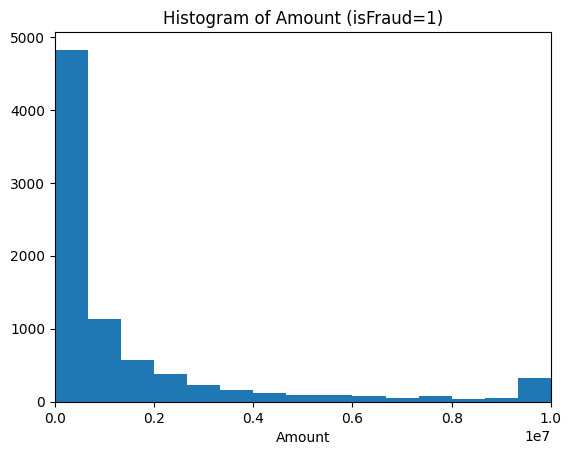

In [ ]:
#isFraud=1 만 히스토그램으로 확인
plt.hist(df1,bins=15)
plt.title('Histogram of Amount (isFraud=1)')
plt.xlabel('Amount')
plt.xlim(left=0,right=10000000)
plt.show()
#전체적으로 낮음 금액에 몰려있으며, 최대금액 부근에서 늘어나는 추세

#### 사기 의심 이유 확인

##### isFlaggedFraud 분포 확인

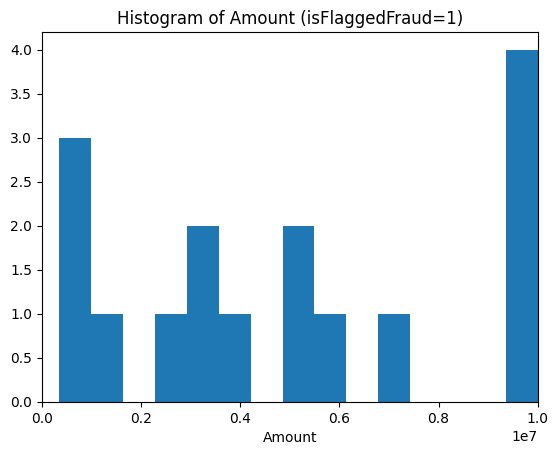

In [ ]:
# isFlaggedFraud(사기의심)=1 분포 확인
df_isFlagged = df[df['isFlaggedFraud']== 1]

plt.hist(df_isFlagged['amount'],bins=15)
plt.title('Histogram of Amount (isFlaggedFraud=1)')
plt.xlabel('Amount')
plt.xlim(left=0,right=10000000)
plt.show()
# 사기 최대금액인 10,000,000을 초과하지 않음. 금액으로 판단은 어렵다 생각되어, 무엇으로 판단하였는지 확인하고자함.

In [ ]:
#사기와 비교를 위한 데이터프레임 저장
df_isFraud = df[df['isFraud']== 1]

#####거래유형(type)

In [ ]:
#Fraud와 FlaggedFraud의 타입 비교
print(f"Fraud : \n{df_isFraud['type'].value_counts()} \n\n Flagged : \n{df_isFlagged['type'].value_counts()}")
# 실제 fraud는 cash_out과 transfer가 비슷한 비율이나, 의심은 Transfer로만 구성됨

Fraud : 
CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64 

 Flagged : 
TRANSFER    16
Name: type, dtype: int64


#####거래 수신 고객(nameDest)

In [ ]:
#Fraud와 FlaggedFraud의 거래 수신 고객 비교
print(f"Fraud : \n{df_isFraud['nameDest'].value_counts()} \n\n Flagged : \n{df_isFlagged['nameDest'].value_counts()}")
#예상보다 수신자가 다양함. 사기의심 수신자가 사기 수신자에 있는지 확인 필요.

Fraud : 
C1193568854    2
C104038589     2
C200064275     2
C1497532505    2
C1601170327    2
              ..
C317811789     1
C24324787      1
C1053414206    1
C2013070624    1
C873221189     1
Name: nameDest, Length: 8169, dtype: int64 

 Flagged : 
C639921569     1
C1147517658    1
C1100697970    1
C891140444     1
C1392803603    1
C1109166882    1
C484597480     1
C1770418982    1
C661958277     1
C1806199534    1
C1909486199    1
C1082139865    1
C1308068787    1
C1395467927    1
C1861208726    1
C1366804249    1
Name: nameDest, dtype: int64


In [ ]:
#명단 비교
FraudDest_list = df_isFraud['nameDest'].drop_duplicates().to_list()
FlaggedDest_list = df_isFlagged['nameDest'].drop_duplicates().to_list()

IntheList = []
for i in FlaggedDest_list:
    if i in FraudDest_list:
        IntheList.append(i)

IntheList
#모두 사기자 명단에 포함되있으므로, 사기의심은 사기 고객에게 금액이 송금되었기 때문이라 판단됨.

['C639921569',
 'C1147517658',
 'C1100697970',
 'C891140444',
 'C1392803603',
 'C1109166882',
 'C484597480',
 'C1770418982',
 'C661958277',
 'C1806199534',
 'C1909486199',
 'C1082139865',
 'C1308068787',
 'C1395467927',
 'C1861208726',
 'C1366804249']

## **🔒 [게임] 문제**
---
* **제시된 게임 플레이 데이터(Non Time-Series)를 대상으로 아래 주어진 문제를 분석 및 시각화 하시오**

* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|ID |ID|
|groupId |그룹ID|
|matchId |경기ID|
|assists |서포트횟수|
|boosts |부스트 아이템 사용횟수|
|damageDealt |총 입힌 데미지|
|DBNOs |적을 기절시킨 횟수|
|headshotKills |헤드샷킬수|
|heals |heal 아이템 사용횟수|
|killPlace |적을제압한위치|
|killPoints |적제압포인트|
|kills |적 제압횟수|
|killStreaks |가장 많이 적 제압횟수|
|longestKill |멀리서 적 제압횟수|
|maxPlace |최악의배치넘버|
|numGroups |그룹넘버|
|revives |부활횟수|
|rideDistance |이동수단 타고 이동거리|
|roadKills |이동수단으로 적 제압횟수|
|swimDistance|수영한거리|
|teamKills |같은팀 제압횟수|
|vehicleDestroys|자동차 파괴횟수|
|walkDistance|도보이동거리|
|weaponsAcquired|무기 획득횟수|
|winPoints|승점|
|winPlacePerc|승률|


In [ ]:
import pandas as pd
df = pd.read_csv('example_3.csv')
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,24,0,0,5,247.30,2,0,4,...,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,1,1,440875,1,1,0,37.65,1,1,0,...,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,2,2,878242,2,0,1,93.73,1,0,2,...,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,3,3,1319841,3,0,0,95.88,0,0,0,...,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,4,4,1757883,4,0,1,0.00,0,0,1,...,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217


### Question 01

In [ ]:
# (1) Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력
df.shape

(6225249, 27)

In [ ]:
#   (2) Data type 확인 → 각 Column별 Data Type 출력
df.dtypes

Unnamed: 0           int64
Id                   int64
groupId              int64
matchId              int64
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
maxPlace             int64
numGroups            int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

In [ ]:
#   (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
df.isnull().sum()

Unnamed: 0               0
Id                       0
groupId                  0
matchId                  0
assists                  0
boosts                   0
damageDealt              0
DBNOs                    0
headshotKills            0
heals                    0
killPlace                0
killPoints               0
kills                    0
killStreaks              0
longestKill              0
maxPlace                 0
numGroups                0
revives                  0
rideDistance             0
roadKills                0
swimDistance             0
teamKills                0
vehicleDestroys          0
walkDistance             0
weaponsAcquired          0
winPoints                0
winPlacePerc       1867913
dtype: int64

####추가탐색

In [ ]:
df.describe()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,6.225249e+06,6.225249e+06,6.225249e+06,6.225249e+06,6.225249e+06,6.225249e+06,6.225249e+06,6.225249e+06,6.225249e+06,6.225249e+06,...,6.225249e+06,6.225249e+06,6.225249e+06,6.225249e+06,6.225249e+06,6.225249e+06,6.225249e+06,6.225249e+06,6.225249e+06,4.357336e+06
mean,1.805186e+06,3.112624e+06,1.350572e+06,3.409077e+04,2.654451e-01,9.636774e-01,1.328694e+02,6.898710e-01,2.384035e-01,1.187107e+00,...,1.650899e-01,4.243218e+02,2.557167e-03,4.181220e+00,1.387061e-02,5.160276e-03,1.055644e+03,3.456372e+00,1.500526e+03,4.718663e-01
std,1.232917e+06,1.797075e+06,7.795765e+05,1.969249e+04,6.339866e-01,1.560587e+00,1.697617e+02,1.190472e+00,6.096861e-01,2.365864e+00,...,4.674371e-01,1.224026e+03,6.232101e-02,2.793776e+01,1.328041e-01,7.446824e-02,1.116701e+03,2.395422e+00,4.245138e+01,3.079147e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+02,0.000000e+00
25%,7.781560e+05,1.556312e+06,6.747140e+05,1.702300e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.334000e+02,2.000000e+00,1.491000e+03,1.979000e-01
50%,1.556312e+06,3.112624e+06,1.351161e+06,3.410000e+04,0.000000e+00,0.000000e+00,8.776000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.736000e+02,3.000000e+00,1.500000e+03,4.583000e-01
75%,2.801023e+06,4.668936e+06,2.026766e+06,5.115500e+04,0.000000e+00,1.000000e+00,1.885000e+02,1.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.808000e+03,5.000000e+00,1.510000e+03,7.407000e-01
max,4.357335e+06,6.225248e+06,2.700605e+06,6.819100e+04,2.000000e+01,1.800000e+01,6.384000e+03,6.300000e+01,2.600000e+01,6.900000e+01,...,4.100000e+01,4.839000e+04,4.200000e+01,8.122000e+03,6.000000e+00,5.000000e+00,1.730000e+04,7.900000e+01,1.971000e+03,1.000000e+00


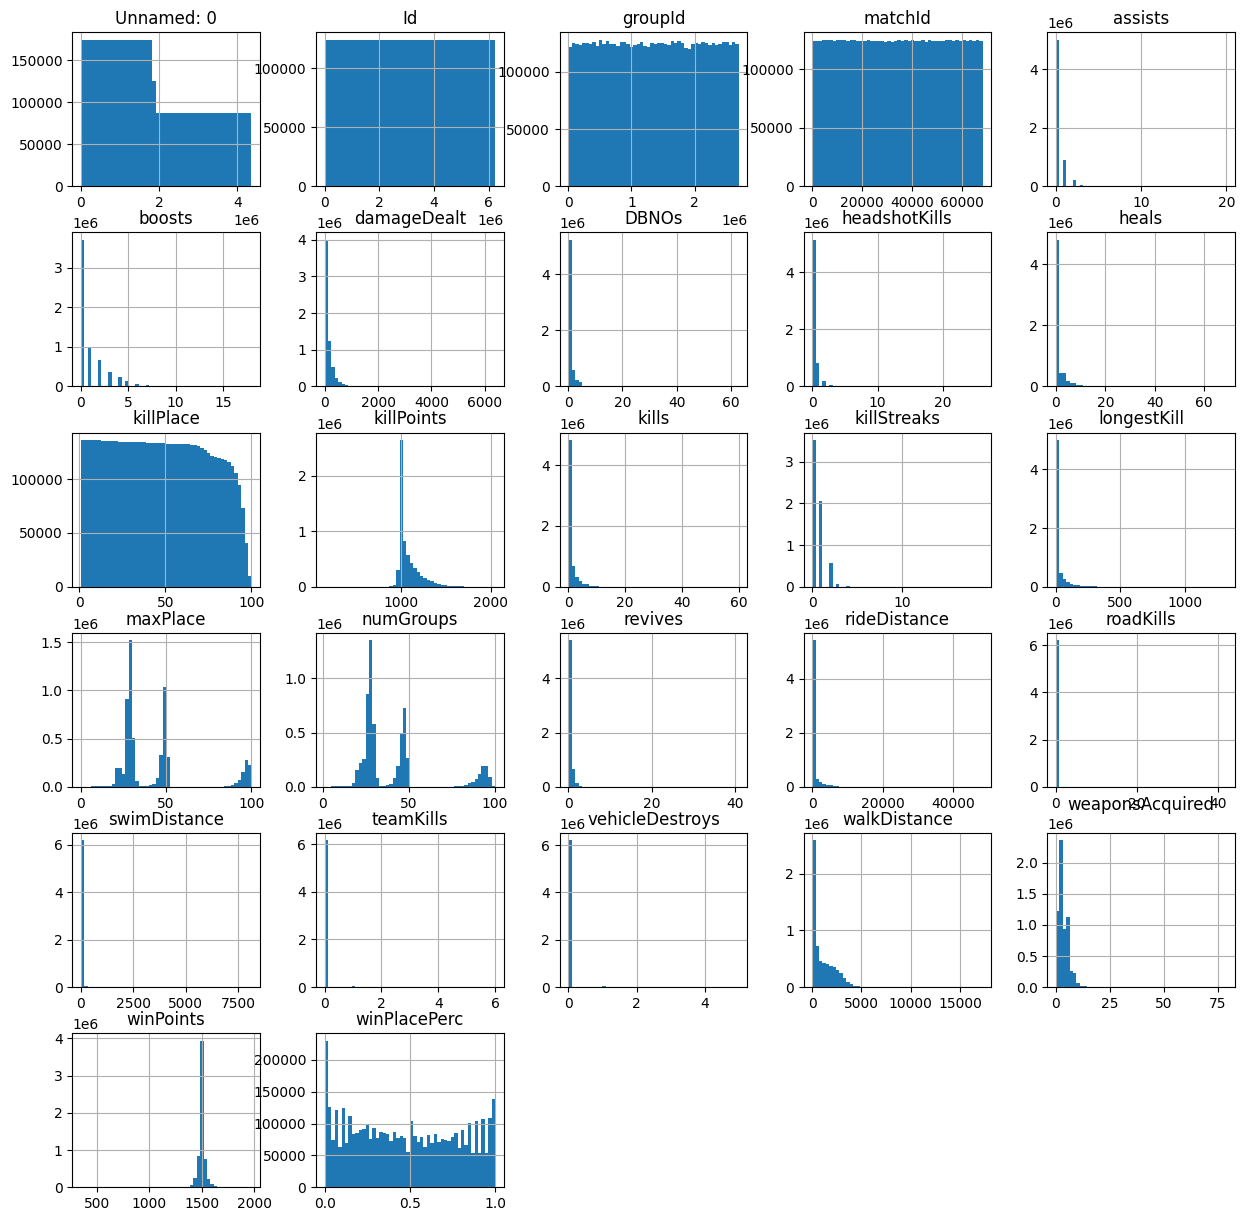

In [ ]:
df.hist(figsize=(15,15),bins = 50);

In [ ]:
df[df['winPlacePerc'].isnull()]['Id'].nunique()
# 6,225,249명 중 1,867,913 명 승률 Null, 224,016명의 승률 0이 존재하는 걸로 보아 첫판이라 판단

1867913

### Question 02

```
다음 가설들을 데이터 분석을 통해 검증하시오.

[가설]
Without moving & WeaponsAcquired - analyze
 : 이동 없이 무기를 획득한 버그 유저가 존재할까?

  (1) _totalDistance가 하위 10%인 Data set을 만드시오.
  (※ '_totalDistance' = 'rideDistance' + 'walkDistance' + 'swimDistance')

  (2) 1번에서 만든 Data set에서 weaponsAcquired가 상위 1%인 버그의심 유저 수를 출력하시오.

```

####2-1

In [ ]:
#   (1) _totalDistance가 하위 10%인 Data set을 만드시오.
#   (※ '_totalDistance' = 'rideDistance' + 'walkDistance' + 'swimDistance')

df['_totalDistance'] = df['rideDistance']+df['walkDistance']+df['swimDistance']
df_shortDistance = df[df['_totalDistance'] <= df['_totalDistance'].quantile(0.1)]
df_shortDistance['_totalDistance'].describe()
#df['_totalDistance'].quantile(0.1) = 39.93

count    622527.000000
mean         15.668901
std          12.332521
min           0.000000
25%           2.791000
50%          15.350000
75%          26.390000
max          37.930000
Name: _totalDistance, dtype: float64

#### 2-2

In [ ]:
# (2) 1번에서 만든 Data set에서 weaponsAcquired가 상위 1%인 버그의심 유저 수를 출력하시오.

df_shortDistance_weaponAcquied = df_shortDistance[df_shortDistance['weaponsAcquired'] >= df_shortDistance['weaponsAcquired'].quantile(0.99)]
df_shortDistance_weaponAcquied['Id'].nunique()
# df_shortDistance['weaponsAcquired'].quantile(0.99) = 3
# 버그의심 유저 15300명

15300

In [ ]:
# 의심유저 명단 리스트 저장
suscpicious_weapon_user = df_shortDistance_weaponAcquied['Id'].drop_duplicates().to_list()
len(suscpicious_weapon_user)

15300

##### 추가탐색
```
killplace가 특이하기에 관련해서 구글링해보니
적을 제압한 위치가아닌 매치내에서 킬 등수로 판단됨.
```
https://www.kaggle.com/competitions/pubg-finish-placement-prediction/data
참고링크

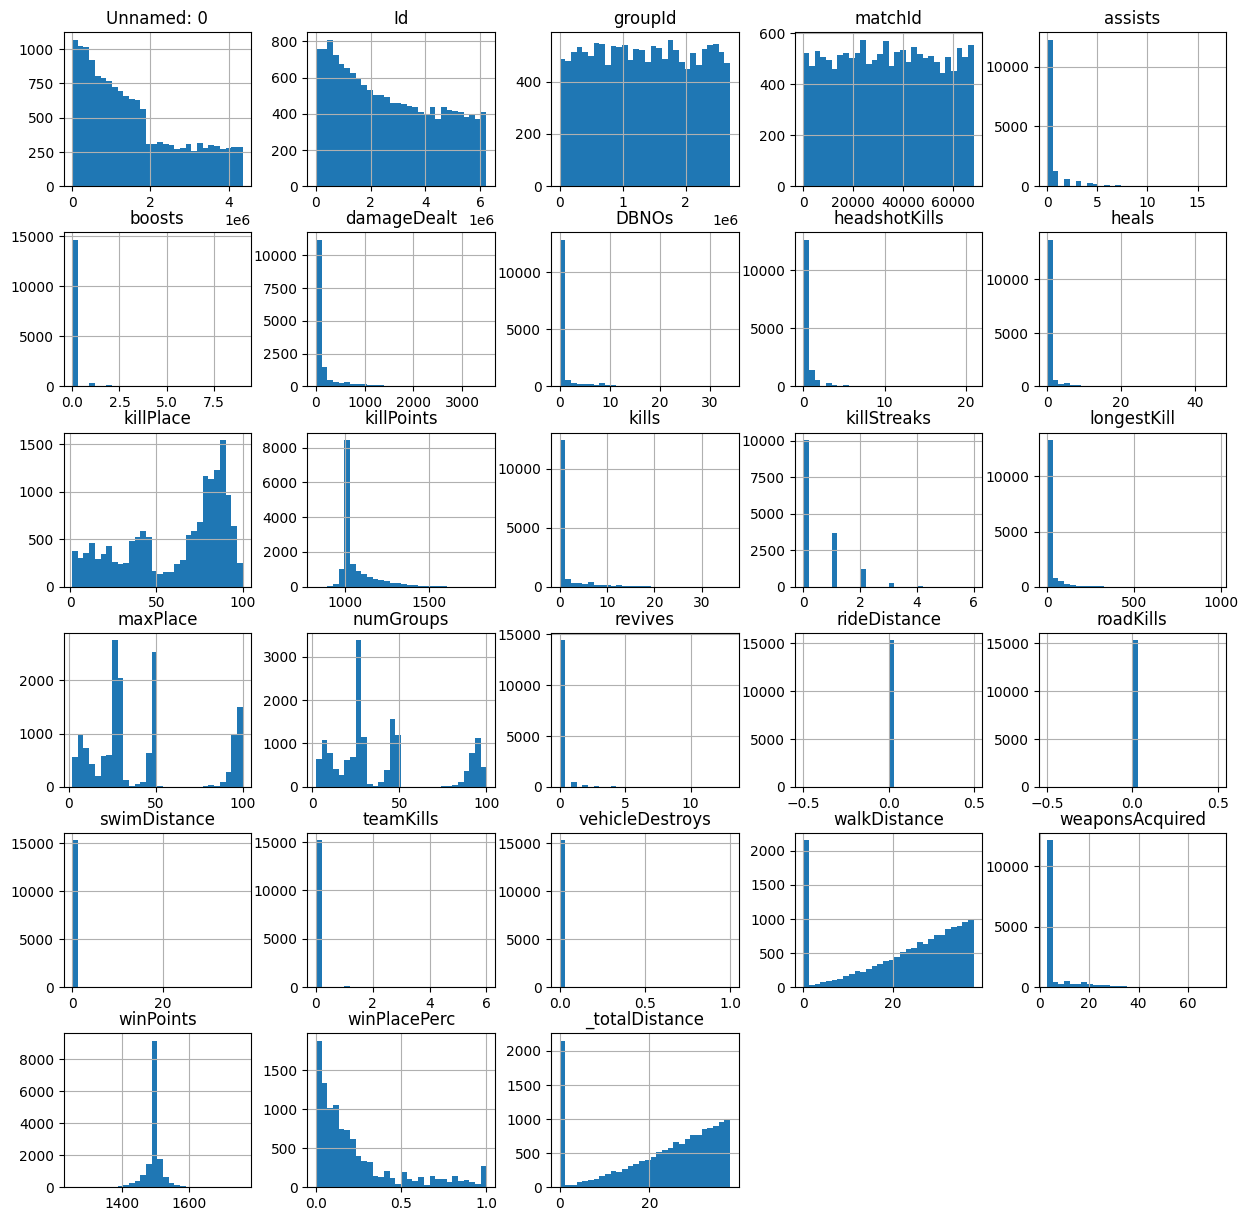

In [ ]:
#의심유저 히스토그램
df_suspicious = df[df['Id'].isin(suscpicious_weapon_user)]
df_suspicious.hist(figsize=(15,15),bins=30);

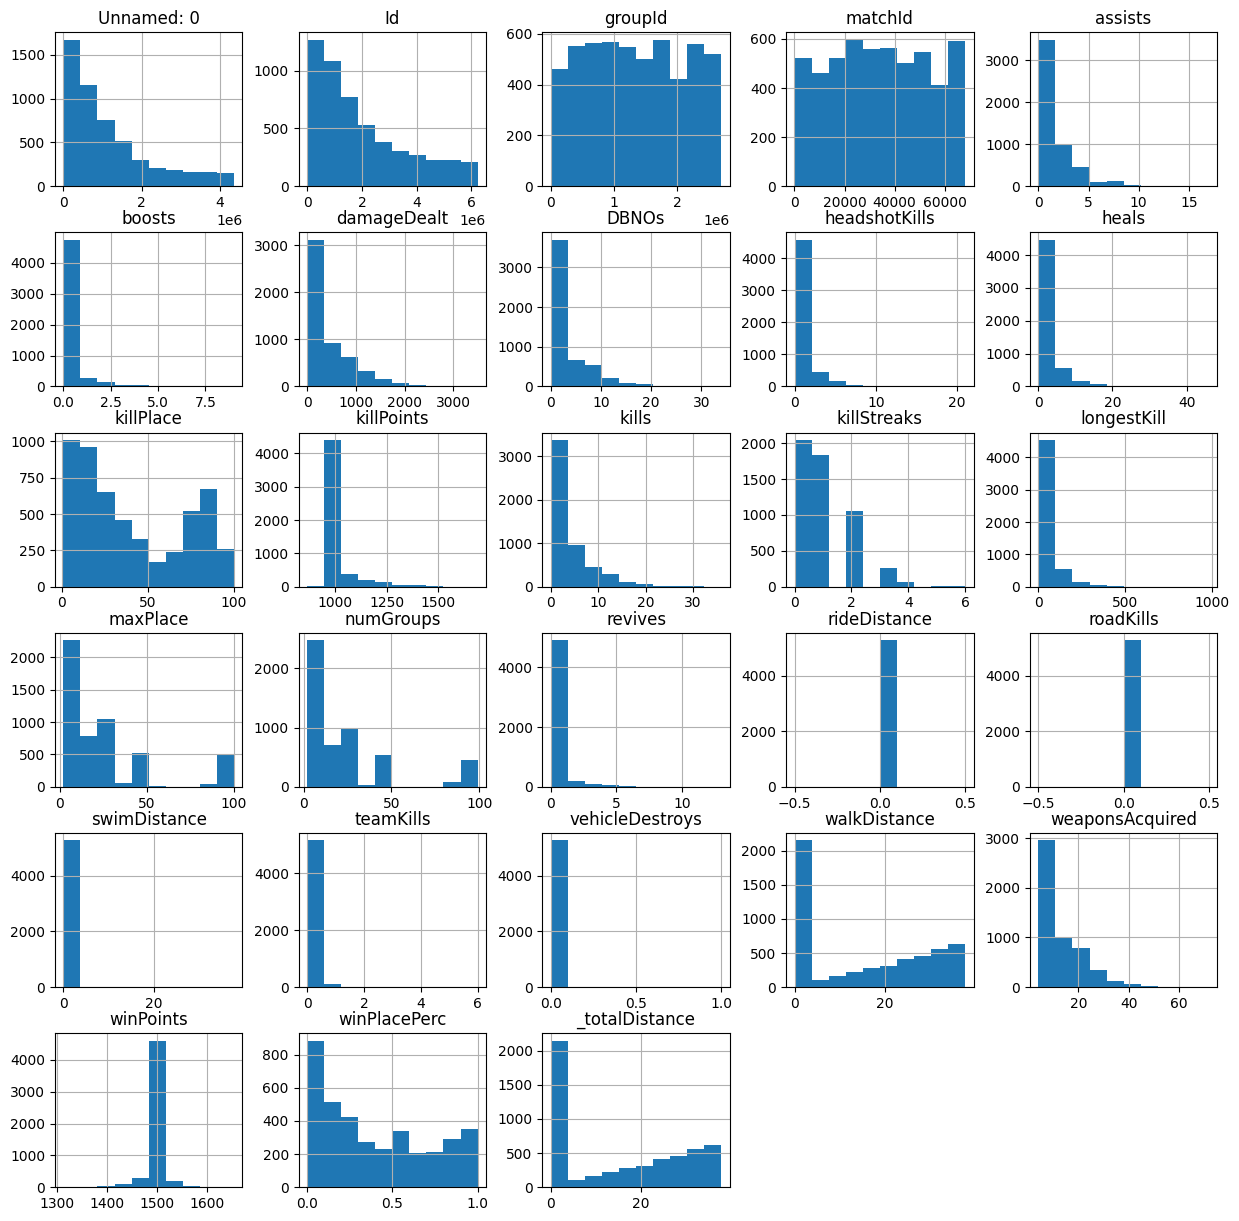

In [ ]:
#무기획득 3개인 인원이 10,025명으로 절반이상을 차지하기에 4개 이상부터 다시 확인
df_weapon4 = df_suspicious[df_suspicious['weaponsAcquired'] >= 4]
df_weapon4.hist(figsize=(15,15));

#### 심화탐색
```
순위인 killplace,maxplace가 모두 높아진 모습.
킬관련 지표들도 모두 높아진 모습.
실력자가 좋은 위치 선정한 것인지, 버그를 악용한여 초반에 킬을 많이 먹은 것인지, 실력자가 버그를 악용한것인지 구분 불가
더 조건을 좁혀야한다고 판단됨.

버그악용이 한 장소에서만 가능하다면, 이동거리에 비해 아이템수가 많을것이며, 상대적으로 킬이 적을 것이라고 판단됨
```

In [ ]:
#이동거리/아이템수 , 킬/아아템수 컬럼 생성
#weapon_per_dist, weapon_per_kill 작을수록 버그 악용 의심 유저

df = df.add(0.000001) #0으로 나누기 방지
df_weapon4 = df_weapon4.add(0.000001)

df_weapon4['weapon_per_dist'] =  df_weapon4['weaponsAcquired']/ df_weapon4['_totalDistance']
df_weapon4['weapon_per_kill'] =  df_weapon4['weaponsAcquired']/ df_weapon4['kills']

df['weapon_per_dist'] =  df['weaponsAcquired'] / df['_totalDistance']
df['weapon_per_kill'] =  df['weaponsAcquired'] / df['kills']

In [ ]:
# 상관없는 컬럼 정리
df_weapon4 = df_weapon4[['weapon_per_dist','weapon_per_kill',  '_totalDistance','weaponsAcquired','kills',
        'Id','assists', 'boosts','damageDealt', 'DBNOs',
        'headshotKills', 'heals', 'killPlace',
       'killPoints',  'killStreaks', 'maxPlace',
        'rideDistance', 'walkDistance',  'winPlacePerc']]

In [ ]:
df_weapon4.describe()

,weapon_per_dist,weapon_per_kill,_totalDistance,weaponsAcquired,kills,Id,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,killStreaks,maxPlace,rideDistance,walkDistance,winPlacePerc
count,5.275000e+03,5.275000e+03,5275.000000,5275.000000,5275.000000,5.275000e+03,5275.000000,5275.000000,5275.000000,5275.000000,5275.000000,5275.000000,5275.000000,5275.000000,5275.000000,5275.000000,5.275000e+03,5275.000000,3725.000000
mean,5.924740e+06,1.997159e+06,15.219101,11.879243,3.597726,1.971033e+06,1.412513,0.200759,422.046178,2.912608,0.958484,1.857821,40.675641,1025.994883,0.959053,26.475830,1.000000e-06,15.199581,0.393054
std,9.071380e+06,3.118592e+06,14.282600,9.233971,4.902856,1.652616e+06,2.073378,0.754257,509.259717,4.315284,1.684315,3.710192,30.774061,75.492559,0.969105,27.215915,2.117783e-22,14.280858,0.325125
min,1.054853e-01,2.500000e-01,0.000001,4.000001,0.000001,8.960000e+02,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,1.000001,865.000001,0.000001,2.000001,1.000000e-06,0.000001,0.000001
25%,1.705030e-01,2.800000e+00,0.000001,4.000001,0.000001,6.458955e+05,0.000001,0.000001,30.100001,0.000001,0.000001,0.000001,13.000001,1000.000001,0.000001,8.000001,1.000000e-06,0.000001,0.106401
50%,9.353079e-01,5.999995e+00,15.210001,8.000001,1.000001,1.450696e+06,0.000001,0.000001,200.000001,1.000001,0.000001,0.000001,31.000001,1000.000001,1.000001,15.000001,1.000000e-06,15.160001,0.322901
75%,1.100000e+07,4.000001e+06,29.460001,18.000001,6.000001,2.936074e+06,2.000001,0.000001,673.950001,5.000001,1.000001,2.000001,74.000001,1000.000001,2.000001,30.000001,1.000000e-06,29.445001,0.666701
max,5.500000e+07,4.800000e+07,37.920001,72.000001,36.000001,6.222109e+06,17.000001,9.000001,3498.000001,34.000001,21.000001,46.000001,100.000001,1691.000001,6.000001,100.000001,1.000000e-06,37.920001,1.000001


In [ ]:
#콜랩 튕김으로 인해 자르기
df_wpd = df[df['weapon_per_dist'] >= 0.105]
df_wpk = df[df['weapon_per_kill'] >= 0.25]

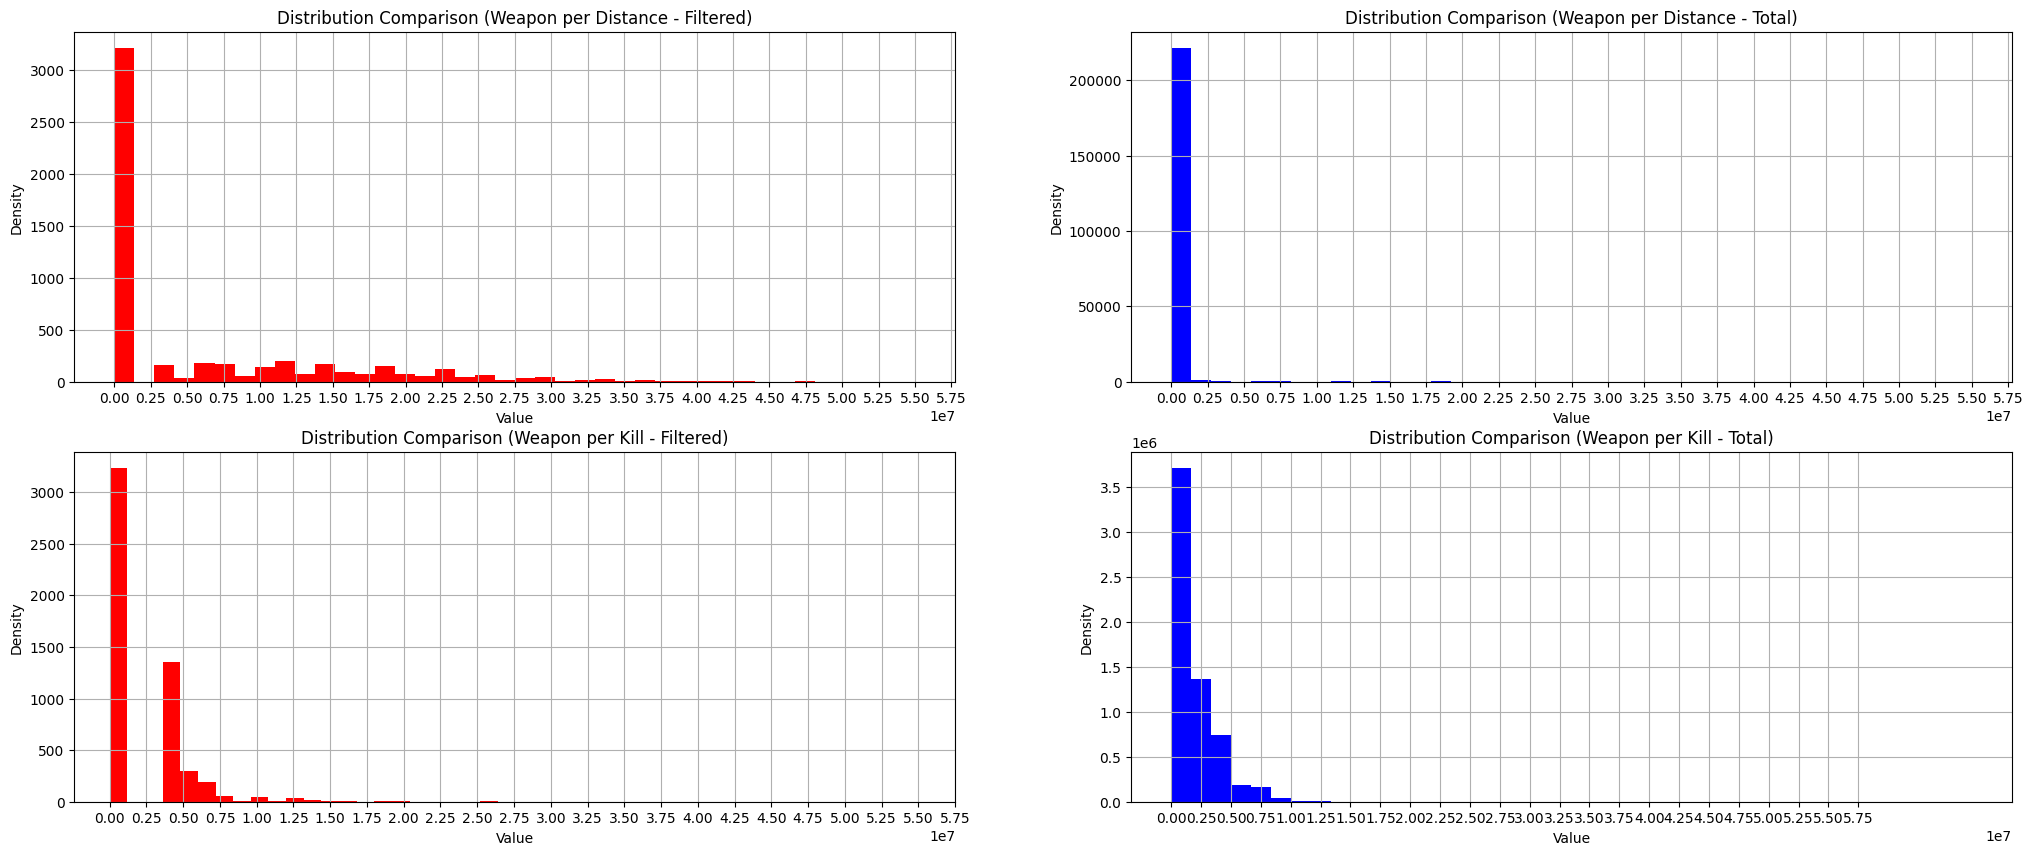

In [ ]:
import numpy as np

fig,axes = plt.subplots(2,2,figsize=(25,10))
xticks = np.arange(0,60000000, 2500000).tolist()

axes[0,0].hist(df_weapon4['weapon_per_dist'], label='Filtered', color='red',bins=40)
axes[0,0].set_title('Distribution Comparison (Weapon per Distance - Filtered)')
axes[0,0].set_xlabel('Value')
axes[0,0].set_ylabel('Density')
axes[0,0].set_xticks(xticks)
axes[0,0].grid(True)

axes[0,1].hist(df_wpd['weapon_per_dist'], label='Filtered', color='blue',bins=40)
axes[0,1].set_title('Distribution Comparison (Weapon per Distance - Total)')
axes[0,1].set_xlabel('Value')
axes[0,1].set_ylabel('Density')
axes[0,1].set_xticks(xticks)
axes[0,1].grid(True)

axes[1,0].hist(df_weapon4['weapon_per_kill'], label='Filtered', color='red',bins=40)
axes[1,0].set_title('Distribution Comparison (Weapon per Kill - Filtered)')
axes[1,0].set_xlabel('Value')
axes[1,0].set_ylabel('Density')
axes[1,0].set_xticks(xticks)
axes[1,0].grid(True)

axes[1,1].hist(df_wpk['weapon_per_kill'], label='Filtered', color='blue',bins=40)
axes[1,1].set_title('Distribution Comparison (Weapon per Kill - Total)')
axes[1,1].set_xlabel('Value')
axes[1,1].set_ylabel('Density')
axes[1,1].set_xticks(xticks)
axes[1,1].grid(True)

plt.show()
# weapon_per_dist와 weapon_per_kill 모두 0.25e7 이상인 대상들이 악용 유저라고 생각됨

In [ ]:
#전체 중 weapon_per_dist,weapon_per_kill 0.25e7 이상
df[(df['weapon_per_dist'] >=2500000)&
           (df['weapon_per_kill'] >=2500000)]
#405명

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,weapon_per_dist,weapon_per_kill
896,8.960000e+02,8.960000e+02,2.655234e+06,896.000001,0.000001,0.000001,296.100001,2.000001,0.000001,1.000001,...,0.000001,1.000001,0.000001,0.000001,8.000001,1500.000001,0.200001,0.000001,8000001.0,8000001.0
3855,3.855000e+03,3.855000e+03,1.255848e+06,3855.000001,0.000001,0.000001,80.060001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,6.000001,1500.000001,0.872301,0.000001,6000001.0,6000001.0
17382,1.738200e+04,1.738200e+04,3.264470e+05,17382.000001,0.000001,0.000001,57.600001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,3.000001,1500.000001,0.200001,0.000001,3000001.0,3000001.0
31562,3.156200e+04,3.156200e+04,9.459130e+05,31562.000001,1.000001,0.000001,30.100001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,12.000001,1500.000001,0.388901,0.000001,12000001.0,12000001.0
38343,3.834300e+04,3.834300e+04,1.246179e+06,38343.000001,2.000001,0.000001,299.000001,5.000001,0.000001,1.000001,...,0.000001,0.000001,0.000001,0.000001,12.000001,1500.000001,0.307701,0.000001,12000001.0,12000001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5652582,1.295246e+06,4.352978e+06,1.867762e+06,52495.000001,0.000001,1.000001,65.120001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,5.000001,1500.000001,NaN,0.000001,5000001.0,5000001.0
5803006,1.445670e+06,4.823456e+06,2.474137e+06,66200.000001,3.000001,0.000001,237.800001,1.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,14.000001,1500.000001,NaN,0.000001,14000001.0,14000001.0
5818436,1.461100e+06,4.883548e+06,2.299321e+06,62243.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,3.000001,1500.000001,NaN,0.000001,3000001.0,3000001.0
5879237,1.521901e+06,5.075565e+06,2.517528e+06,67211.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,4.000001,1500.000001,NaN,0.000001,4000001.0,4000001.0


<Axes: >

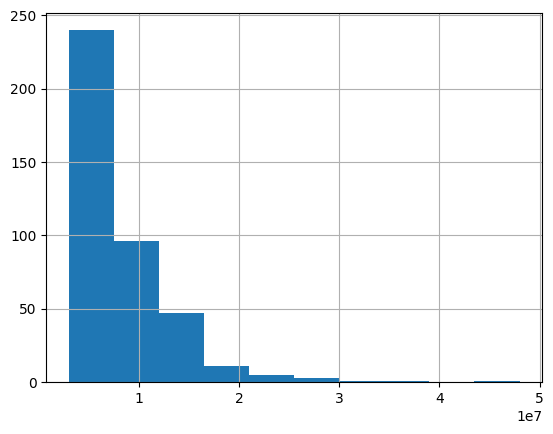

In [ ]:
final_suspicious = df[(df['weapon_per_dist'] >=2500000)&
           (df['weapon_per_kill'] >=2500000)]

final_suspicious['weapon_per_dist'].hist()

####Conclusion
```
버그 악용하여 필요한 아이템 파밍 후 이동 또는 버그 악용 위해 이동 후 악용 가능성은 판단 불가하며 의심만 가능.

405명이 의심가능하나 로그데이터를 통해 버그 악용 위치를 파악하고, 해당 위치에서 아이템 획득 개수를 파악하여 악용 여부를 파악하는 것이 적합해보임.

해당 데이터를 통해 추가적으로 볼 만한 것들
- 팀킬 데이터를 통한 트롤링 여부 확인
- 헤드샷 비율 데이터를 통한 헤드샷 핵 확인
- 멀리서 적 제압 데이터를 통한 원거리핵 확인
```